In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-business-rankings-2020/Top250.csv
/kaggle/input/restaurant-business-rankings-2020/Future50.csv
/kaggle/input/restaurant-business-rankings-2020/Independence100.csv


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
IndepResto = pd.read_csv("../input/restaurant-business-rankings-2020/Independence100.csv")

From the call above, we get this table.

In [4]:
IndepResto.head()

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0


In [5]:
IndepResto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           100 non-null    int64  
 1   Restaurant     100 non-null    object 
 2   Sales          100 non-null    float64
 3   Average Check  100 non-null    int64  
 4   City           100 non-null    object 
 5   State          100 non-null    object 
 6   Meals Served   100 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


# 1. Number of Independent Restaurant at Cities

Number of restaurants at a city are a good parameter to know the civilization status of the city. If there are a lot of restaurants (espescially independent restaurant that usually create the cultural food), that means there are a lot of people inside the city and its economic movement is fast.

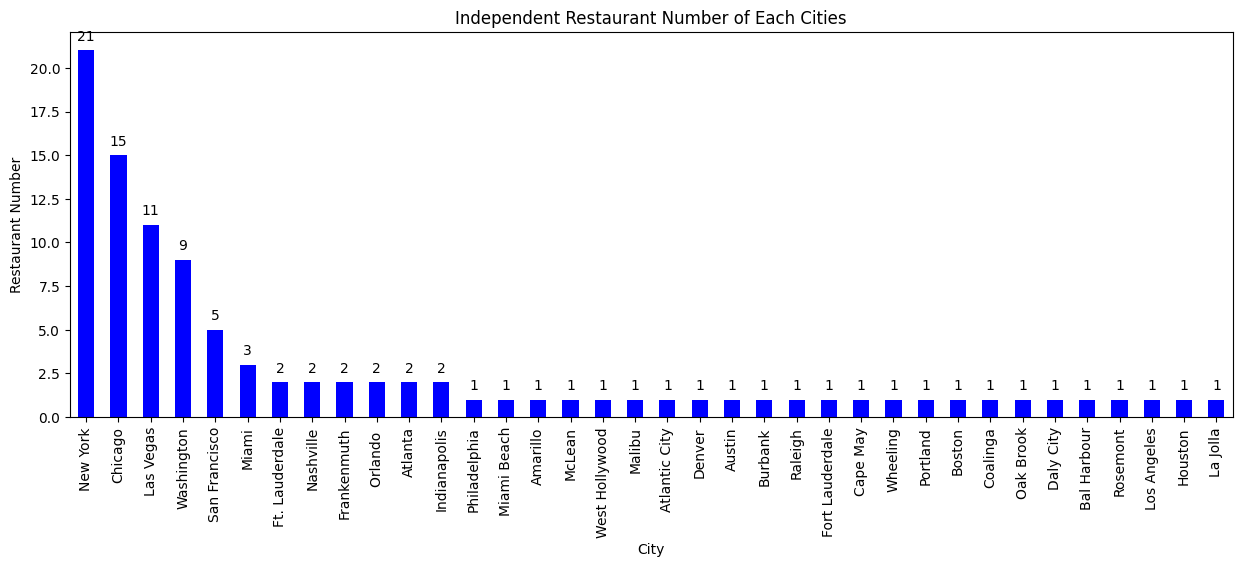

In [6]:
# Plotting the bar chart
plt.figure(figsize=(15, 5))
bar_plot = IndepResto['City'].value_counts(dropna=False).plot.bar(color=['blue'])

# Annotating each bar with the count
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Independent Restaurant Number of Each Cities')
plt.xlabel('City')
plt.ylabel('Restaurant Number')
plt.show()

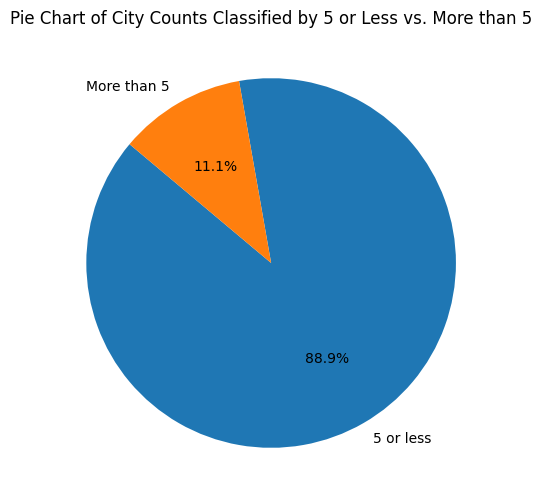

In [7]:
# Get the value counts of the 'City' column
city_counts = IndepResto['City'].value_counts()

# Classify the counts into two categories
classified = city_counts.apply(lambda x: 'More than 5' if x > 5 else '5 or less')

# Group by classification and aggregate the counts
grouped = classified.groupby(classified).size()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of City Counts Classified by 5 or Less vs. More than 5')
plt.show()

From the barchart above we can see that almost 90% of US cities have 5 or less numbers of Independent Restaurant. Even only 3 of US Cities have more than 10 independent restaurants. There are New York, Chicago, Las Vegas, and Washington

# 2. Number of Sales at Each Cities

In [8]:
# Calculate the average sales by city
average_sales_by_city = IndepResto.groupby('City')['Sales'].mean().reset_index()

# Rename the columns for clarity
average_sales_by_city.columns = ['City', 'Average Sales (thousand dollars)']

average_sales_by_city['Average Sales (thousand dollars)'] = (average_sales_by_city['Average Sales (thousand dollars)'] / 1000).round(2)
average_sales_by_city = average_sales_by_city.sort_values(by='Average Sales (thousand dollars)', ascending=False)


print(average_sales_by_city)

               City  Average Sales (thousand dollars)
27         Orlando                           27523.93
30          Raleigh                          24268.16
23      Miami Beach                          23800.00
26        Oak Brook                          19831.82
15          Houston                          19530.16
28     Philadelphia                          19379.15
25         New York                          19355.90
35         Wheeling                          18687.60
18        Las Vegas                          18663.33
19      Los Angeles                          18521.00
31         Rosemont                          18483.06
4       Bal Harbour                          18216.91
22            Miami                          18160.58
10        Daly City                          18159.61
33       Washington                          17934.89
8           Chicago                          17898.80
9          Coalinga                          17599.47
14   Ft. Lauderdale         

In [9]:
# Calculate the average sales by city
average_meals_by_city = IndepResto.groupby('City')['Meals Served'].mean().reset_index()

# Rename the columns for clarity
average_meals_by_city.columns = ['City', 'Average Meals Served (thousand pieces)']
average_meals_by_city['Average Meals Served (thousand pieces)'] = (average_meals_by_city['Average Meals Served (thousand pieces)'] / 1000).round(2)
average_meals_by_city = average_meals_by_city.sort_values(by='Average Meals Served (thousand pieces)', ascending=False)

print(average_meals_by_city)

               City  Average Meals Served (thousand pieces)
13      Frankenmuth                                  929.16
35         Wheeling                                  625.91
27         Orlando                                   619.16
9          Coalinga                                  611.93
11           Denver                                  553.38
3            Austin                                  495.93
28     Philadelphia                                  486.22
0          Amarillo                                  478.00
10        Daly City                                  473.49
33       Washington                                  444.88
24        Nashville                                  432.52
14   Ft. Lauderdale                                  390.38
21           McLean                                  390.10
15          Houston                                  375.24
12  Fort Lauderdale                                  356.00
19      Los Angeles                     

From the tables above we can see that top 5 of sales and meals served are coming from other cities where the numbers of independent restaurant there are less then 5. This can be a proof that independent restaurant are one of the city uniqueness there and respected by the people, respected more than the big cities, because there are more franchises there, too. 

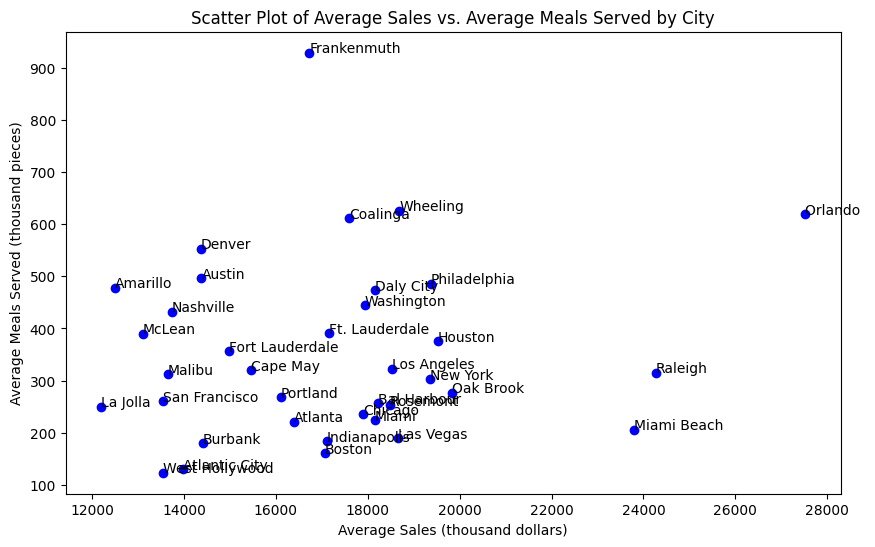

In [10]:
# Merge the DataFrames on the 'City' column
merged_df = pd.merge(average_sales_by_city, average_meals_by_city, on='City')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Average Sales (thousand dollars)'], merged_df['Average Meals Served (thousand pieces)'], c='blue', marker='o')

# Add labels for each city
for i, row in merged_df.iterrows():
    plt.text(row['Average Sales (thousand dollars)'], row['Average Meals Served (thousand pieces)'], row['City'])

# Add labels and title
plt.xlabel('Average Sales (thousand dollars)')
plt.ylabel('Average Meals Served (thousand pieces)')
plt.title('Scatter Plot of Average Sales vs. Average Meals Served by City')

# Display the plot
plt.show()

From the scatterplot above we can see that city of Orlando has the biggest of the average sales number, but the city of Frankenmuth has the biggest of the average meals served number. Which can make us assume that restaurants (only 2 of them) at Frankenmuth has the cheapest price, because it has the highest number of meals served but still not has the highest sale number. But, is it true? Let's find out the price 

In [11]:
# Figure out the average price by dividing total sales and total meals served
Meals_Price = (IndepResto['Sales']/IndepResto['Meals Served']).round(2)
IndepResto['Average Meals Price'] = Meals_Price
IndepResto

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served,Average Meals Price
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0,83.18
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0,42.91
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0,32.60
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0,135.60
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0,66.75
...,...,...,...,...,...,...,...,...
95,96,George's at the Cove,12194000.0,80,La Jolla,Calif.,250000.0,48.78
96,97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0,139.97
97,98,Mi Vida,12032014.0,38,Washington,D.C.,226226.0,53.19
98,99,Upland,11965564.0,52,New York,N.Y.,171825.0,69.64


In [12]:
# Calculate the average sales by city
average_price_by_city = IndepResto.groupby('City')['Average Meals Price'].mean().reset_index()

# Rename the columns for clarity
average_price_by_city.columns = ['City', 'Average Meals Price (dollars)']
average_price_by_city['Average Meals Price (dollars)'] = average_price_by_city['Average Meals Price (dollars)'].round(2)
average_price_by_city = average_price_by_city.sort_values(by='Average Meals Price (dollars)', ascending=False)

print(average_price_by_city)

               City  Average Meals Price (dollars)
23      Miami Beach                         115.53
34   West Hollywood                         110.00
2     Atlantic City                         107.91
18        Las Vegas                         107.79
5            Boston                         106.14
16     Indianapolis                          92.34
25         New York                          83.37
22            Miami                          81.63
8           Chicago                          80.67
1           Atlanta                          80.34
6           Burbank                          79.90
30          Raleigh                          77.04
31         Rosemont                          73.22
26        Oak Brook                          71.74
4       Bal Harbour                          70.93
29         Portland                          60.10
19      Los Angeles                          57.42
32    San Francisco                          53.29
15          Houston            

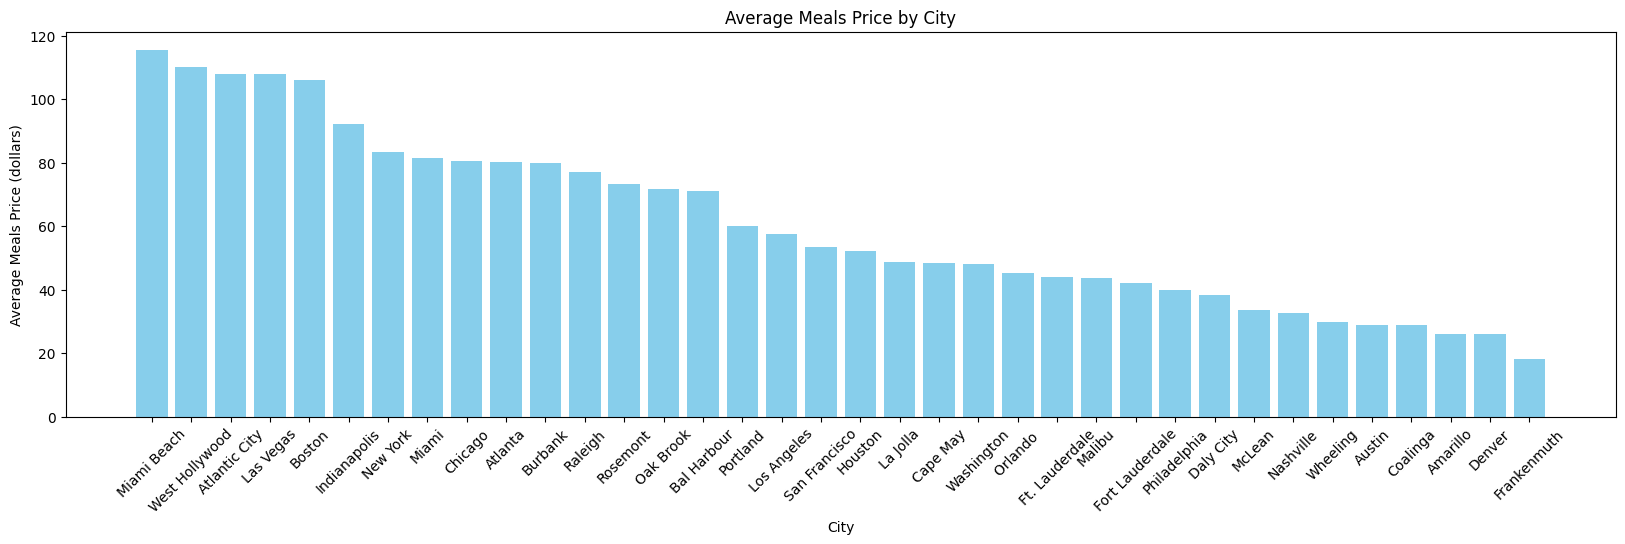

In [13]:
# Sort the DataFrame by 'Average Meals Price (dollars)' in descending order
average_price_by_city = average_price_by_city.sort_values(by='Average Meals Price (dollars)', ascending=False)

# Create the bar chart
plt.figure(figsize=(20, 5))
plt.bar(average_price_by_city['City'], average_price_by_city['Average Meals Price (dollars)'], color='skyblue')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Average Meals Price (dollars)')
plt.xticks(rotation=45)
plt.title('Average Meals Price by City')

# Display the plot
plt.show()

Top 5 most expensive independent restaurant comes from the well-known cities like Miami Beach, West Hollywood, Las Vegas, Boston, and Atlantic City, and as we predicted earlier, foods in Frankenmuth are the cheapest

# 3. Create the Restaurant Rank

In [14]:
IndepSalesLarge = IndepResto.nlargest(n = 10, columns = 'Sales').sort_values('Sales', ascending = False)
IndepSalesLarge

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served,Average Meals Price
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0,83.18
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0,42.91
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0,32.60
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0,135.60
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0,66.75
5,6,Gibsons Bar & Steakhouse,25409952.0,80,Chicago,Ill.,348567.0,72.90
6,7,Top of the World at the STRAT,25233543.0,103,Las Vegas,Nev.,246054.0,102.55
7,8,Maple & Ash,24837595.0,99,Chicago,Ill.,210832.0,117.81
8,9,Balthazar,24547800.0,87,New York,N.Y.,519000.0,47.30
9,10,Smith & Wollensky,24501000.0,107,New York,N.Y.,257364.0,95.20


Almost all of the top 10 biggest sales restaurant are located in top 5 cities. Only The Boathouse Orlando that don't belong to them. It can be the reason why average sales in Orlando is one of the highest, because there are only 2 independent restaurants there.

In [15]:
IndepSalesSmall = IndepResto.nsmallest(n = 10, columns = 'Sales').sort_values('Sales', ascending = False)
IndepSalesSmall

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served,Average Meals Price
90,91,"Park Avenue Summer (Autumn, Winter, Spring)",12498000.0,84,New York,N.Y.,164531.0,75.96
91,92,Farmers & Distillers,12278839.0,36,Washington,D.C.,375309.0,32.72
92,93,Virgil's Real Barbecue,12245998.0,31,New York,N.Y.,251800.0,48.63
93,94,"Carmine's (Washington, D.C.)",12228168.0,39,Washington,D.C.,148135.0,82.55
94,95,Franciscan Crab Restaurant,12218147.0,59,San Francisco,Calif.,240000.0,50.91
95,96,George's at the Cove,12194000.0,80,La Jolla,Calif.,250000.0,48.78
96,97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0,139.97
97,98,Mi Vida,12032014.0,38,Washington,D.C.,226226.0,53.19
98,99,Upland,11965564.0,52,New York,N.Y.,171825.0,69.64
99,100,Virgil's Real Barbecue,11391678.0,27,Las Vegas,Nev.,208276.0,54.70


In [16]:
IndepServeLarge = IndepResto.nlargest(n = 10, columns = 'Meals Served').sort_values('Meals Served', ascending = False)
IndepServeLarge

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served,Average Meals Price
57,58,Zehnder's of Frankenmuth,16063684.0,17,Frankenmuth,Mich.,959026.0,16.75
13,14,Junior's (Times Square),23640652.0,23,New York,N.Y.,914500.0,25.85
49,50,Frankenmuth Bavarian Inn,17388751.0,19,Frankenmuth,Mich.,899284.0,19.34
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0,32.60
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0,42.91
42,43,Junior's (49th Street),17834390.0,22,New York,N.Y.,798000.0,22.35
14,15,The Hamilton,23138062.0,33,Washington,D.C.,700861.0,33.01
41,42,"Founding Farmers (Washington, D.C.)",17910045.0,33,Washington,D.C.,648096.0,27.63
29,30,Bob Chinn's Crab House,18687601.0,48,Wheeling,Ill.,625907.0,29.86
46,47,Harris Ranch Inn & Restaurant,17599468.0,29,Coalinga,Calif.,611928.0,28.76


Meanwhile, all of the Frankenmuth's restaurant, with their cheap price, has the highest and the third highest number of meals served. That makes the Frankenmuth has the highest meals served of all cities

In [17]:
IndepServeSmall = IndepResto.nsmallest(n = 10, columns = 'Meals Served').sort_values('Meals Served', ascending = False)
IndepServeSmall

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served,Average Meals Price
93,94,"Carmine's (Washington, D.C.)",12228168.0,39,Washington,D.C.,148135.0,82.55
21,22,SW Steakhouse,21523650.0,149,Las Vegas,Nev.,145700.0,147.73
55,56,Delmonico Steakhouse,16154000.0,103,Las Vegas,Nev.,133000.0,121.46
75,76,Carmine's (Atlantic City),13987843.0,39,Atlantic City,N.J.,129630.0,107.91
79,80,BOA Steakhouse,13552485.0,110,West Hollywood,Calif.,123204.0,110.00
63,64,Prime & Provisions,15100000.0,130,Chicago,Ill.,116154.0,130.00
36,37,Lavo Italian Restaurant & Lounge,18386262.0,97,Las Vegas,Nev.,115500.0,159.19
37,38,Prime Steakhouse,18248030.0,173,Las Vegas,Nev.,113600.0,160.63
31,32,Del Posto,18625033.0,194,New York,N.Y.,95000.0,196.05
96,97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0,139.97


Text(0.5, 1.0, 'Scatter Plot of Sales vs. Meals Served by Restaurant')

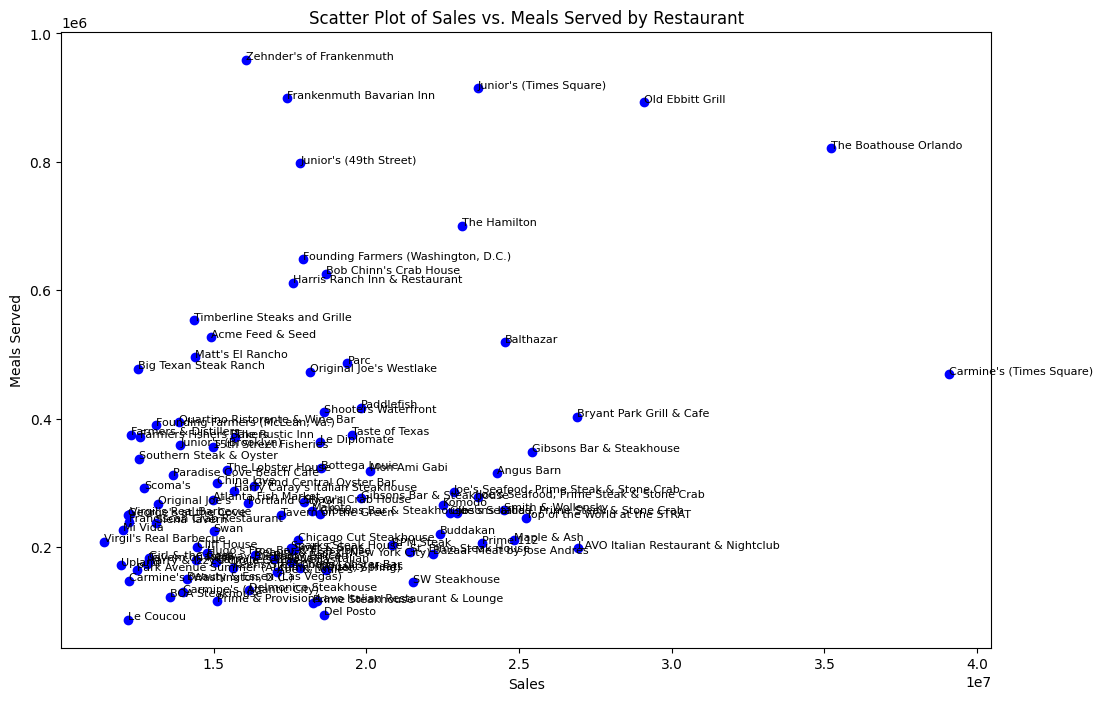

In [18]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(IndepResto['Sales'], IndepResto['Meals Served'], c='blue', marker='o')

# Add labels for each restaurant
for i, row in IndepResto.iterrows():
    plt.text(row['Sales'], row['Meals Served'], row['Restaurant'], fontsize=8)

# Add labels and title
plt.xlabel('Sales')
plt.ylabel('Meals Served')
plt.title('Scatter Plot of Sales vs. Meals Served by Restaurant')

In [19]:
IndepPriceExpensive = IndepResto.nlargest(n = 10, columns = 'Average Meals Price').sort_values('Average Meals Price', ascending = False)
IndepPriceExpensive

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served,Average Meals Price
31,32,Del Posto,18625033.0,194,New York,N.Y.,95000.0,196.05
37,38,Prime Steakhouse,18248030.0,173,Las Vegas,Nev.,113600.0,160.63
36,37,Lavo Italian Restaurant & Lounge,18386262.0,97,Las Vegas,Nev.,115500.0,159.19
21,22,SW Steakhouse,21523650.0,149,Las Vegas,Nev.,145700.0,147.73
96,97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0,139.97
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0,135.60
63,64,Prime & Provisions,15100000.0,130,Chicago,Ill.,116154.0,130.00
55,56,Delmonico Steakhouse,16154000.0,103,Las Vegas,Nev.,133000.0,121.46
7,8,Maple & Ash,24837595.0,99,Chicago,Ill.,210832.0,117.81
20,21,Bazaar Meat by Jose Andres,22181607.0,119,Las Vegas,Nev.,190000.0,116.75


In [20]:
IndepPriceCheap = IndepResto.nsmallest(n = 10, columns = 'Average Meals Price').sort_values('Average Meals Price', ascending = False)
IndepPriceCheap

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served,Average Meals Price
72,73,Matt's El Rancho,14381904.0,29,Austin,Texas,495927.0,29.00
46,47,Harris Ranch Inn & Restaurant,17599468.0,29,Coalinga,Calif.,611928.0,28.76
68,69,Acme Feed & Seed,14897125.0,22,Nashville,Tenn.,527130.0,28.26
41,42,"Founding Farmers (Washington, D.C.)",17910045.0,33,Washington,D.C.,648096.0,27.63
89,90,Big Texan Steak Ranch,12505200.0,24,Amarillo,Texas,478000.0,26.16
73,74,Timberline Steaks and Grille,14362103.0,37,Denver,Colo.,553378.0,25.95
13,14,Junior's (Times Square),23640652.0,23,New York,N.Y.,914500.0,25.85
42,43,Junior's (49th Street),17834390.0,22,New York,N.Y.,798000.0,22.35
49,50,Frankenmuth Bavarian Inn,17388751.0,19,Frankenmuth,Mich.,899284.0,19.34
57,58,Zehnder's of Frankenmuth,16063684.0,17,Frankenmuth,Mich.,959026.0,16.75


Text(0.5, 1.0, 'Scatter Plot of Sales vs. Meals Served by Restaurant')

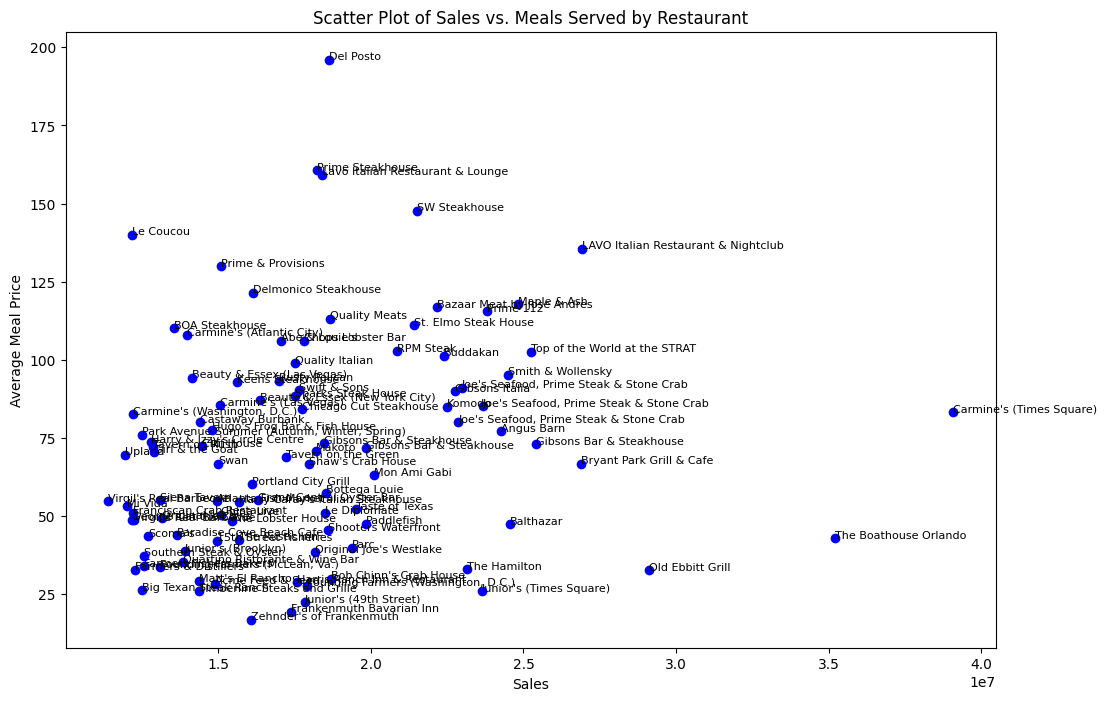

In [21]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(IndepResto['Sales'], IndepResto['Average Meals Price'], c='blue', marker='o')

# Add labels for each restaurant
for i, row in IndepResto.iterrows():
    plt.text(row['Sales'], row['Average Meals Price'], row['Restaurant'], fontsize=8)

# Add labels and title
plt.xlabel('Sales')
plt.ylabel('Average Meal Price')
plt.title('Scatter Plot of Sales vs. Meals Served by Restaurant')

From the scatterplot above, we can see that some restaurants with high sales number like Carmine's (Times Square), The Boathouse Orlando, and Old Ebbit Grill don't create an expensive menu. Meanwhile restaurants like Del Posto, Prime Steakhouse, and Lavo Italian Restaurant & Lounge, that has expensive menus, has the average number of sales

Text(0.5, 1.0, 'Scatter Plot of Sales vs. Meals Served by Restaurant')

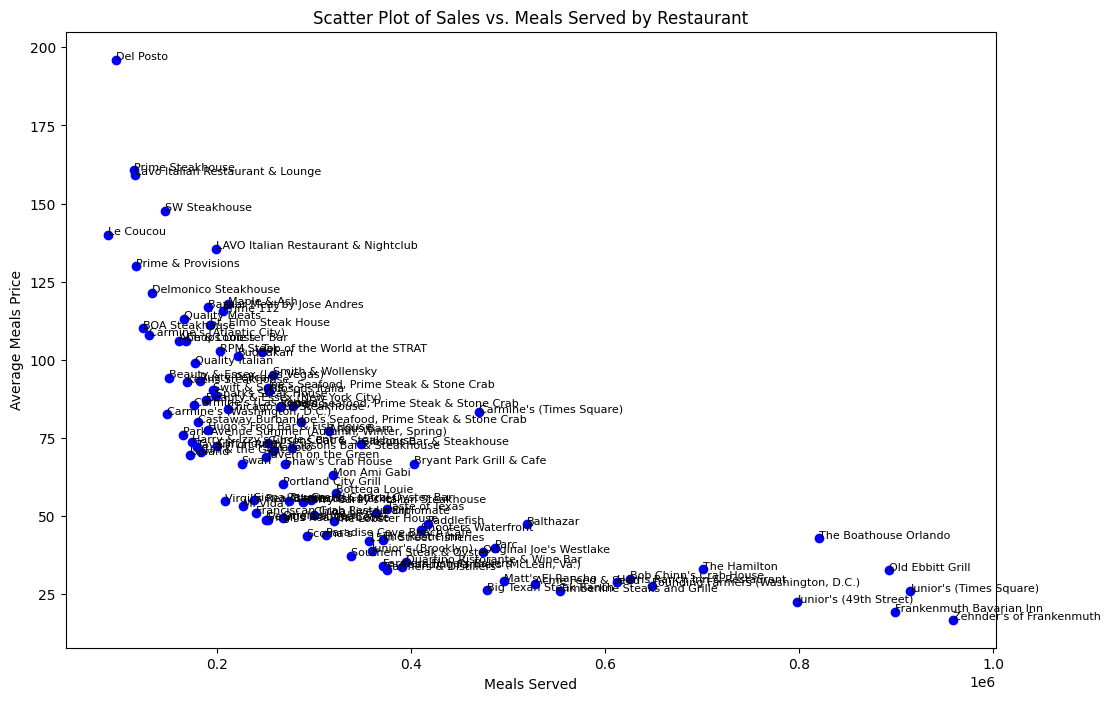

In [22]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(IndepResto['Meals Served'], IndepResto['Average Meals Price'], c='blue', marker='o')

# Add labels for each restaurant
for i, row in IndepResto.iterrows():
    plt.text(row['Meals Served'], row['Average Meals Price'], row['Restaurant'], fontsize=8)

# Add labels and title
plt.xlabel('Meals Served')
plt.ylabel('Average Meals Price')
plt.title('Scatter Plot of Sales vs. Meals Served by Restaurant')

PotentSalesLarge = PotentResto.nsmallest(n = 10, columns = 'Unit_Volume').sort_values('Unit_Volume', ascending = False)
PotentSalesLarge

# Conclusion

## The Data Above shows that
## 1. There are some cities with a lot of restaurant, but if you can create the best restaurant, you can get huge number of sales
## 2. The more expensive your food is, the less meals you'll served
## 3. But less meals don't mean you'll get less sales, if your price and your serve are correct, you can get enough sells, too.